# Data Science - Regressão Linear

## Conhecendo o Dataset

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import warnings

warnings.filterwarnings('ignore') 
#warnings.filterwarnings(action='once')

In [0]:
dados_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear/Consumo_cerveja.csv', sep=';')

dados_df.head(7)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732


In [0]:
dados_df.shape

(365, 7)

## Análises Preliminares

### Estatísticas descritivas

In [0]:
dados_df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


### Matriz de correlação

O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [0]:
dados_df.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


## Analisando comportamento da Variável Dependente (Y)

### Visualizando a variável dependente

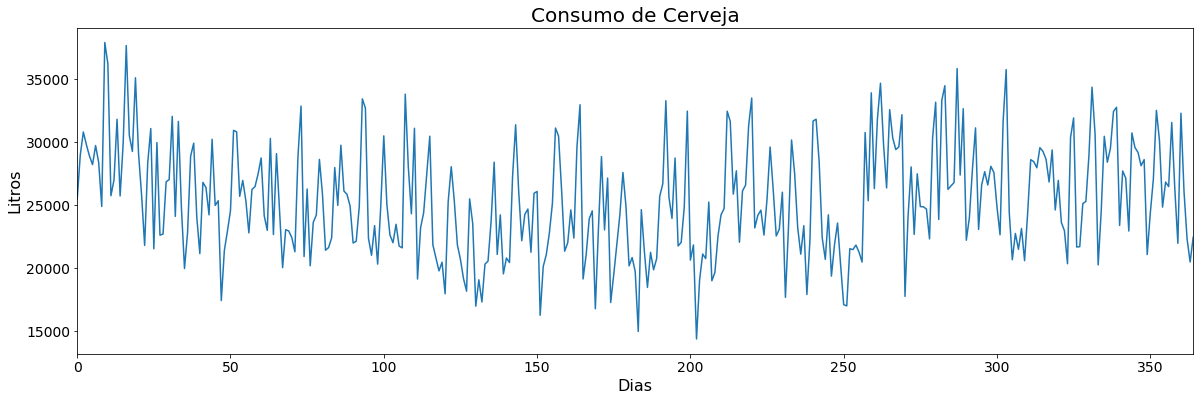

In [0]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados_df['consumo'].plot(fontsize=14)

### Box plot da variável dependente

<img width='700px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear/Box-Plot.png'>

In [0]:
import seaborn as sns

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

# https://seaborn.pydata.org/api.html#style-api
# https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial
# https://seaborn.pydata.org/api.html#palette-api
# https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

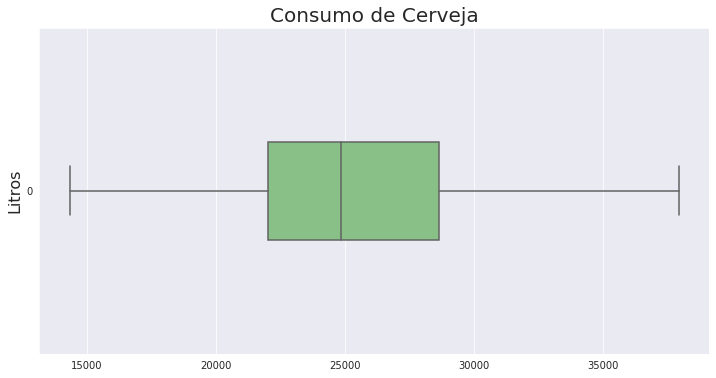

In [0]:
ax = sns.boxplot(data=dados_df['consumo'], orient='h', width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)

ax

### Investigando a variável dependente dada uma segunda característica

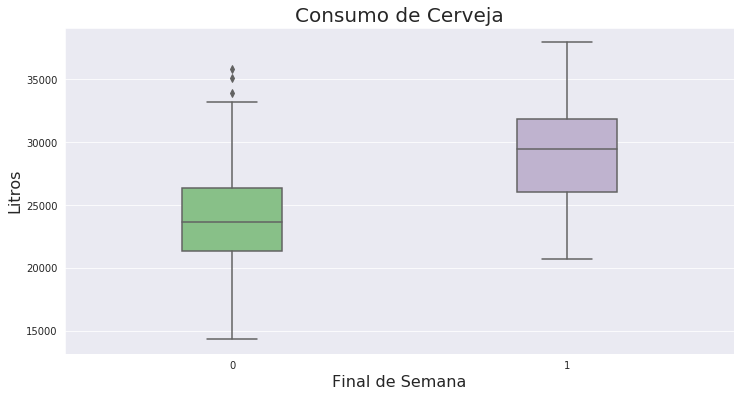

In [0]:
ax = sns.boxplot(y='consumo', x='fds', data=dados_df, orient='v', width=0.3)

ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)

ax

### Distribuição de frequências da variável dependente

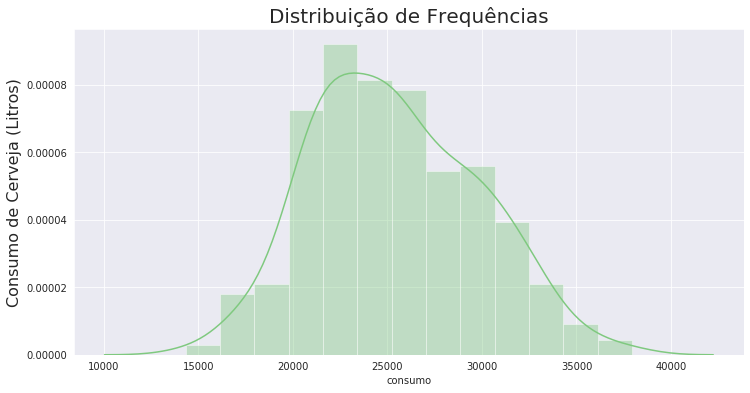

In [0]:
ax = sns.distplot(dados_df['consumo'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

ax

## Variável Dependente X Variáveis Explicativas (pairplot)

Gráficos de dispersão entre as variáveis do dataset

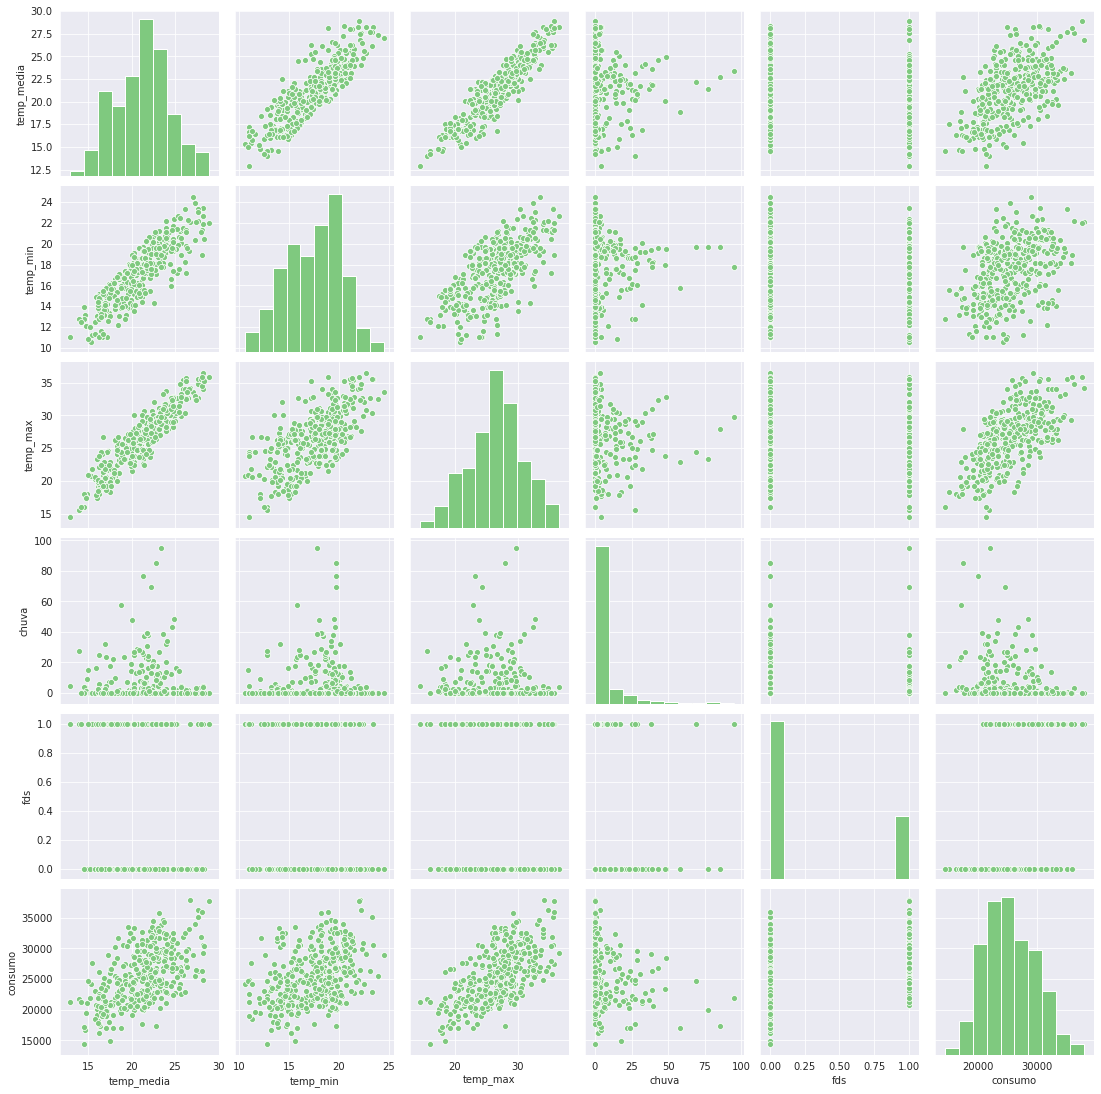

In [0]:
ax = sns.pairplot(dados_df)
# Plota o relacionamento entre pares de variáveis em um dataset.

Plotando o pairplot fixando somente uma variável no eixo y

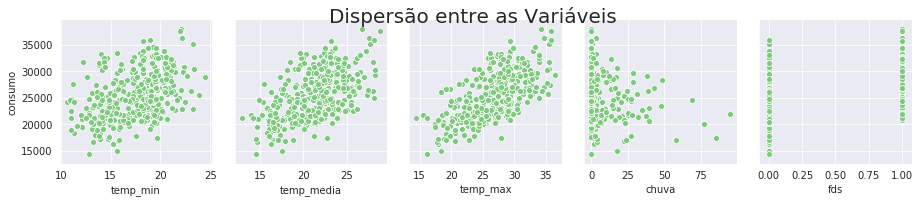

In [0]:
ax = sns.pairplot(dados_df, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Vamos ver se é possível separar linearmente as variáveis

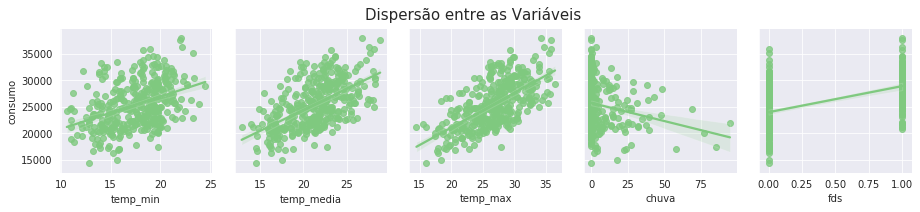

In [0]:
ax = sns.pairplot(dados_df, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=15, y=1.10)
ax

## Variável Dependente X Variáveis Explicativas (jointplot)

Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência

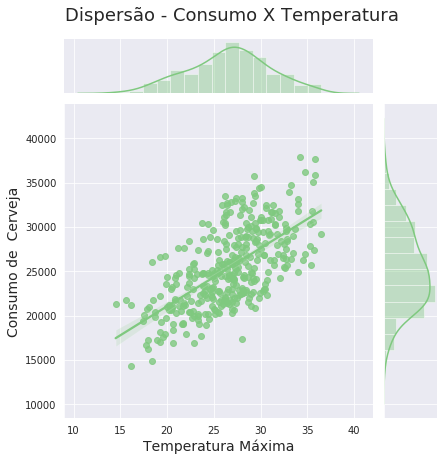

In [0]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados_df, kind='reg')

ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)

ax

# Caso não queira a reta de regressão, basta remover o parametro kind

## Variável Dependente X Variáveis Explicativas (lmplot)

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas

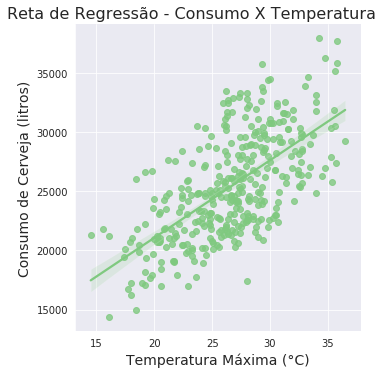

In [0]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados_df)

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)

ax

### Plotando um lmplot utilizando uma terceira variável na análise (Em um mesmo gráfico)

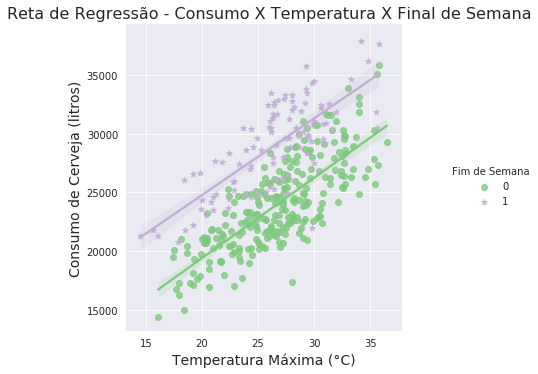

In [0]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados_df, hue="fds", markers=['o', '*'], legend=False)

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")

ax

### Plotando um lmplot utilizando uma terceira variável na análise (Em gráficos diferentes)

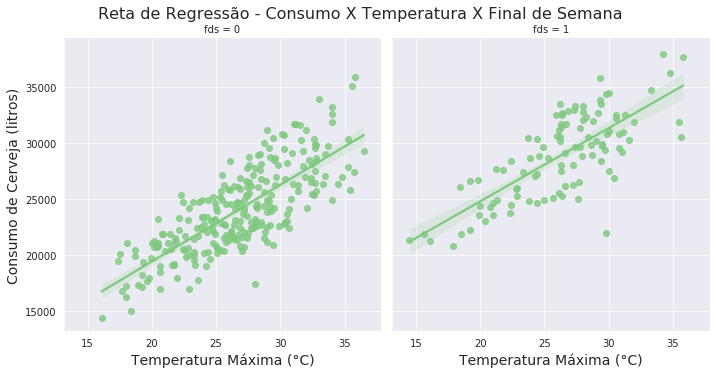

In [0]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados_df, col="fds")

ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)

ax

## Regresão Linear


A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

<img width='700px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear/fun_regressao.jpg'>

### Gerando dados de teste e treino

Uma vez que os dados foram obtidos, transformados e analisados, podemos agora utilizá-lo para obter informações, previsões futuras, classificar dados novos e etc...

Para isso devemos criar e tratar nosso mode-lo. O primeiro passo é separar os dados em dados treino, dados de teste, target (no caso de classificação) e variaveis explicativas (parâmetros que serão usados para classificar ou prever o target).

In [0]:
from sklearn.model_selection import train_test_split

Criando uma Series para armazenar o Consumo de Cerveja (Variável dependente ou ainda y)

In [0]:
y = dados_df['consumo']

Criando um DataFrame para armazenar as variáveis explicativas (X).

Neste caso só usaremos 3:

In [0]:
X = dados_df[['temp_max', 'chuva', 'fds']]

Criando os datasets de treino e de teste de forma aleatoria a fim de não viciar as amostras

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

### Verificando os tamanhos dos DF gerados pelo train_test_split

In [0]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (255, 3)
X_test:  (110, 3)


In [0]:
X_train.shape[0] + X_test.shape[0]

365

In [0]:
# 30% dos dados deve ser de teste
X.shape[0] * 0.3

109.5

In [0]:
X.shape[0] * 0.7

255.49999999999997

### Gerando modelo de regressão

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
modelo = LinearRegression()

Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de Treino (y_train e X_train)

In [0]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de Treino  (y_train e X_train)

<h3>R²</h3>
Também chamado de coeficiente de determinação, é uma medida de ajustamento de um modelo estatístico linear generalizado. Este pode variar entre 0 e 1, indicando o quanto o modelo consegue explicar os valores observados.

Quanto maior o R² mais explicativo é o modelo, melhor ele se ajusta à amostra, ou seja se o coeficiente de determinação é 0.85, significa que 85% da variável dependente (y) pode ser explicada pelos regressores presentes no modelo.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [0]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.73


### Gerando previsões a partir do modelo para os dados de Teste (X_test)

In [0]:
y_previsto = modelo.predict(X_test)

### Obtendo o coeficiente de determinação (R²) para as previsões do modelo

In [0]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


## Realizando previsões

### Prevendo dados do próprio DF (apenas para explicar)

In [0]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [0]:
modelo.predict(entrada)[0]

26094.901775262017

### Se a temperatura máxima for 40c°, sem chuva e for um Fim de semana, quanto vai aumentar o consumo de cerveja?

In [0]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


## Interpretação dos Coeficientes Estimados

<img width='700px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear/exp_regressao.jpg'>

### Obtendo o intercepto do modelo

O coeficiente **intercepto** representa o efeito médio na variável dependente $Y$, que neste caso é Consumo de Cerveja, tendo todas as variáveis explicativas excluídas do modelo, ou seja é o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.

In [0]:
modelo.intercept_

5951.976339312445

### Obtendo os coeficientes de regressão

Os **coeficientes de regressão** $\beta_2$ e $\beta_3$ também são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**.

Os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, ou seja, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.

No modelo em questão, significa o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. 

In [0]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

### Analisando coeficientes

Criando uma lista com os nomes das variáveis do modelo

In [0]:
# Criando uma lista com os nomes das variáveis do modelo
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


<h4>Entendendo como estes Coeficientes se relacionam com a variável dependente</h4>

**Intercepto**: Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de **5951,98 litros**.

<br/>

**Temperatura Máxima (°C)**: Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de **684,74 litros**.

<br/>

**Chuva (mm)**: Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de **-60,78 litros**.

<br/>

**Final de Semana (Sim/Não)**: Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de **5401,08 litros**.

## Análises Gráficas dos resultados do Modelo

### Gerando as previsões do modelo para os dados de Treino (X_train)

In [0]:
y_previsto_train = modelo.predict(X_train)

### Gráfico de dispersão entre valor estimado vs valor real


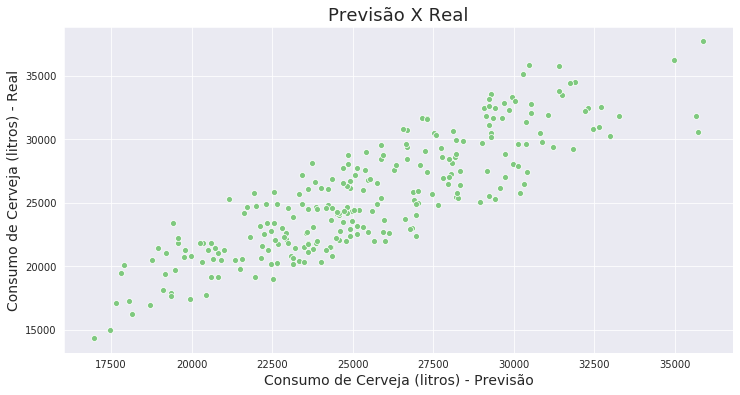

In [0]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)

ax

### Obtendo os resíduos

<img  width='800px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/residuo.png'>

In [0]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

### Verificando a homocedasticidade dos resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<img  width='600px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear/variancia.jpg'>

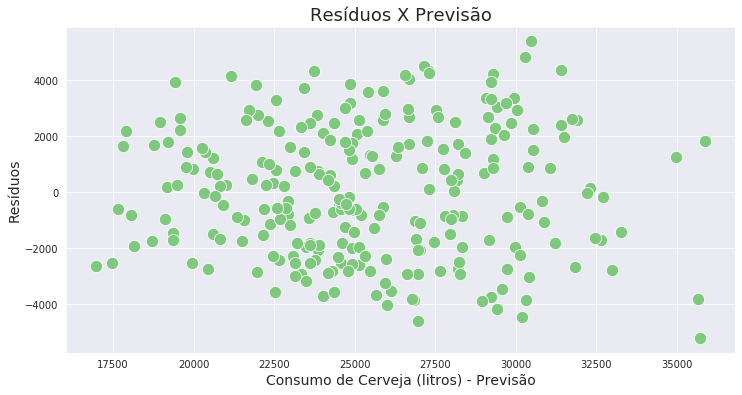

In [32]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)

ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

ax

Utilizando os resíduos ao quadrado

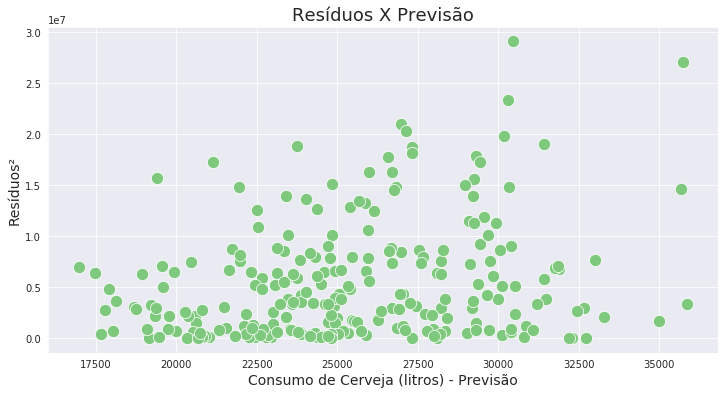

In [33]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)

ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)

ax

### Plotando a distribuição de frequências dos resíduos

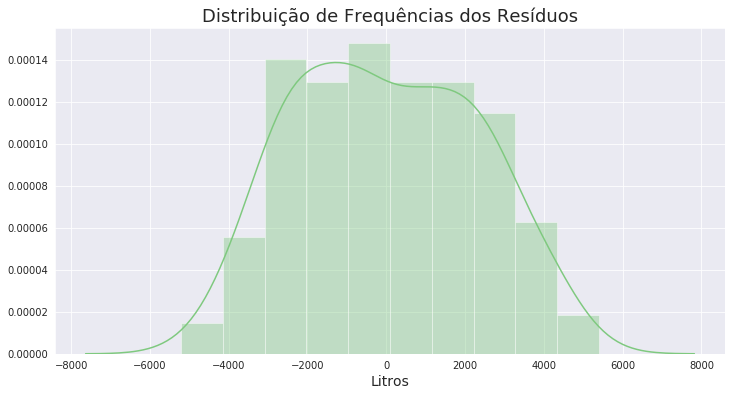

In [34]:
ax = sns.distplot(residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)

ax

## Criando novo modelo (para fins comparativos)

### Criando modelo trocando temperatura máxima por temperatura média

In [0]:
X2 = dados_df[['temp_media', 'chuva', 'fds']]

### Gerando dados de teste e treino

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

### Instanciando a classe *LinearRegression()*

In [40]:
modelo_2 = LinearRegression()
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Obtendo o coeficiente de determinação (R²) de ambos os modelos

In [41]:
print(f'Modelo com Temperatura Média\nR² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temperatura Média
R² = 0.66


In [42]:
print(f'Modelo com Temperatura Máxima\nR² = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temperatura Máxima
R² = 0.73


### Gerando previsões para os dados de Teste (X_test e X2_test) para ambos os modelos 

In [0]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) das *previsões* de ambos os modelos

In [44]:
print(f'Modelo com Temperatura Média\nR² =  = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com Temperatura Média
R² =  = 0.66


In [45]:
print(f'Modelo com Temperatura Máxima\nR² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temperatura Máxima
R² = 0.69


## Mais métricas de Regressão

### Métricas da regressão

Uma vez que tenho mais de um modelo definido, é possível compara-los para definr qual o melhor utilizando as métricas de regressão:

<br/>

**Erro Quadrático Médio** : Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

<br/>

**Raíz do Erro Quadrático Médio** : Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



### Métricas do modelo com Temp. Média

In [48]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


### Métricas do modelo com Temp. Máxima

In [47]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## Salvando modelo gerado

In [0]:
import pickle

### Salvando modelo

In [0]:
arquivo_modelo = 'modelo_consumo_cerveja.sav'
pickle.dump(modelo, open(arquivo_modelo, 'wb'))

### Carregando modelo

In [0]:
arquivo_modelo = open('modelo_consumo_cerveja.sav','rb')
modelo_salvo = pickle.load(arquivo_modelo)
arquivo_modelo.close()

### Nova previsão (para verificar se funciona)

In [57]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo_salvo.predict(entrada)[0]))

26094.90 litros
